In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.formula.api import ols, glm

# 데이터 확인

In [3]:
df_red = pd.read_csv('../data/ML_data/winequality-red.csv', sep=';', header=0)
df_red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [7]:
df_white = pd.read_csv('../data/ML_data/winequality-white.csv', sep=';', header=0)
df_white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [8]:
# 전처리한 파일 >> csv 파일로 변환
df_red.to_csv('../data/ML_data/winequality-red-mod.csv', index=False)
df_white.to_csv('../data/ML_data/winequality-white-mod.csv', index=False)

In [9]:
pd.read_csv('../data/ML_data/winequality-red-mod.csv')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
pd.read_csv('../data/ML_data/winequality-white-mod.csv')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# 데이터 병합

In [11]:
df_red.insert(0, column='type', value='red')
df_red.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df_white.insert(0, column='type', value='white')
df_white.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


## 데이터 모양 확인

In [13]:
print(df_red.shape, df_white.shape)

(1599, 13) (4898, 13)


In [16]:
raw = pd.concat([df_red, df_white]).reset_index(drop=True)
wine = raw.copy()

print(wine.shape)
wine.head(2)

(6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [17]:
wine.to_csv('../data/ML_data/wine.csv', index=False)

# EDA

In [18]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [19]:
# 컬럼 이름의 띄어쓰기를 밑줄로 바꾸기
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [21]:
wine.columns = wine.columns.str.replace(' ', '_')

In [22]:
wine.head(1)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [25]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [26]:
wine['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

# 데이터 모델링

In [27]:
wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [28]:
wine.groupby('type')['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


In [30]:
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']

In [34]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var=False)

# pvalue=8.168348870049682e-24 (< 0.05)
# 즉, 두 집단(레드, 화이트) 간 평균의 차이가 있음.

TtestResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24, df=2950.750452166697)

# 회귀분석

In [35]:
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [36]:
rformula = \
'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides +\
free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [37]:
result = ols(rformula, data=wine).fit()

In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        11:46:52   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
rformula = \
'quality ~ fixed_acidity + volatile_acidity + residual_sugar +\
free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

result = ols(rformula, data=wine).fit()

In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     296.7
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        11:51:16   Log-Likelihood:                -7217.8
No. Observations:                6497   AIC:                         1.446e+04
Df Residuals:                    6487   BIC:                         1.452e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               60.0409     11.645      5.156      0.000      37.212      82.870
fixed_acidity            0.0662      0.015      4.412      0.000       0.037       0.096
volatile_acidity        -1.3043      0.071    -18.445      0.000      -1.443      -1.166
residual_sugar           0.0453      0.005      9.024      0.000       0.035       0.055
free_sulfur_dioxide      0.0059      0.001      7.911      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -9.217      0.000      -0.003      -0.002
density                -59.4185     11.873     -5.004      0.000     -82.694     -36.143
pH                       0.4782      0.088      5.411      0.000       0.305       0.651
sulphates                0.7378      0.075      9.903      0.000       0.592       0.884
alcohol                  0.2647      0.017     15.886      0.000       0.232       0.297
==============================================================================
Omnibus:                      144.178   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.085
Skew:                          -0.004   Prob(JB):                     2.56e-71
Kurtosis:                       4.096   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# difference() : DF에만 사용
# 해당 []에 속하지 않은 열들을 반환한다.
condition = wine.columns.difference(['quality', 'type'])

sample1 = wine[condition]
sample1.head(3)

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76


In [46]:
y_pred = result.predict(sample1[:5])

In [47]:
y_pred

0    4.975950
1    4.905454
2    5.016237
3    5.687222
4    4.975950
dtype: float64

In [48]:
wine[:5].quality

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

# 결과 시각화

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_37552\2730385600.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(red_wine_quality, kde=True, color='red', label='red_wine')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tjdtn\AppData\Local\Temp\ipykernel_37552\2730385600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a f

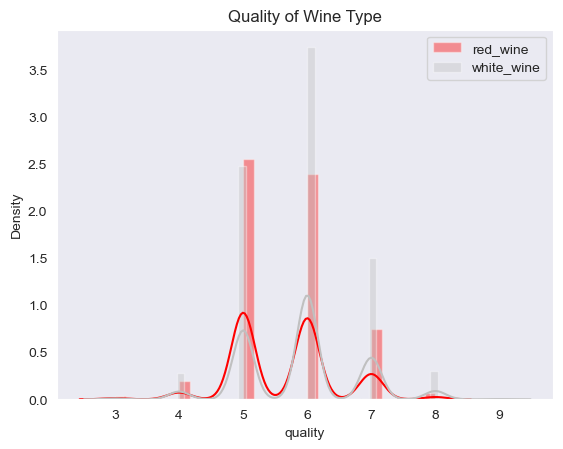

In [51]:
# 와인 유형에 따른 품질 등급 시각화
sns.set_style('dark')
sns.distplot(red_wine_quality, kde=True, color='red', label='red_wine')
sns.distplot(white_wine_quality, kde=True, color='silver', label='white_wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()

## 부분회귀플롯 시각화

In [52]:
import statsmodels.api as sm

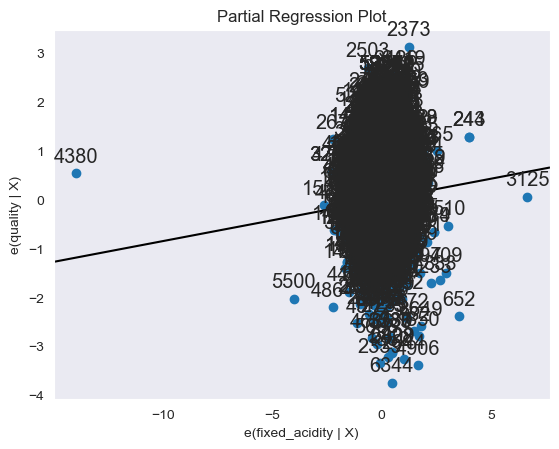

In [53]:
# fixed_acidity >> quality에 미치는 영향력 시각화
# plot_partregress
# 'quality' : 종속변수 / 'fixed_acidity' : 독립변수
# ret_coords=True : 부분회귀플롯의 점에 대한 좌표 변환

others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))
p, resids = sm.graphics.plot_partregress("quality", "fixed_acidity", others, data = wine, ret_coords = True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

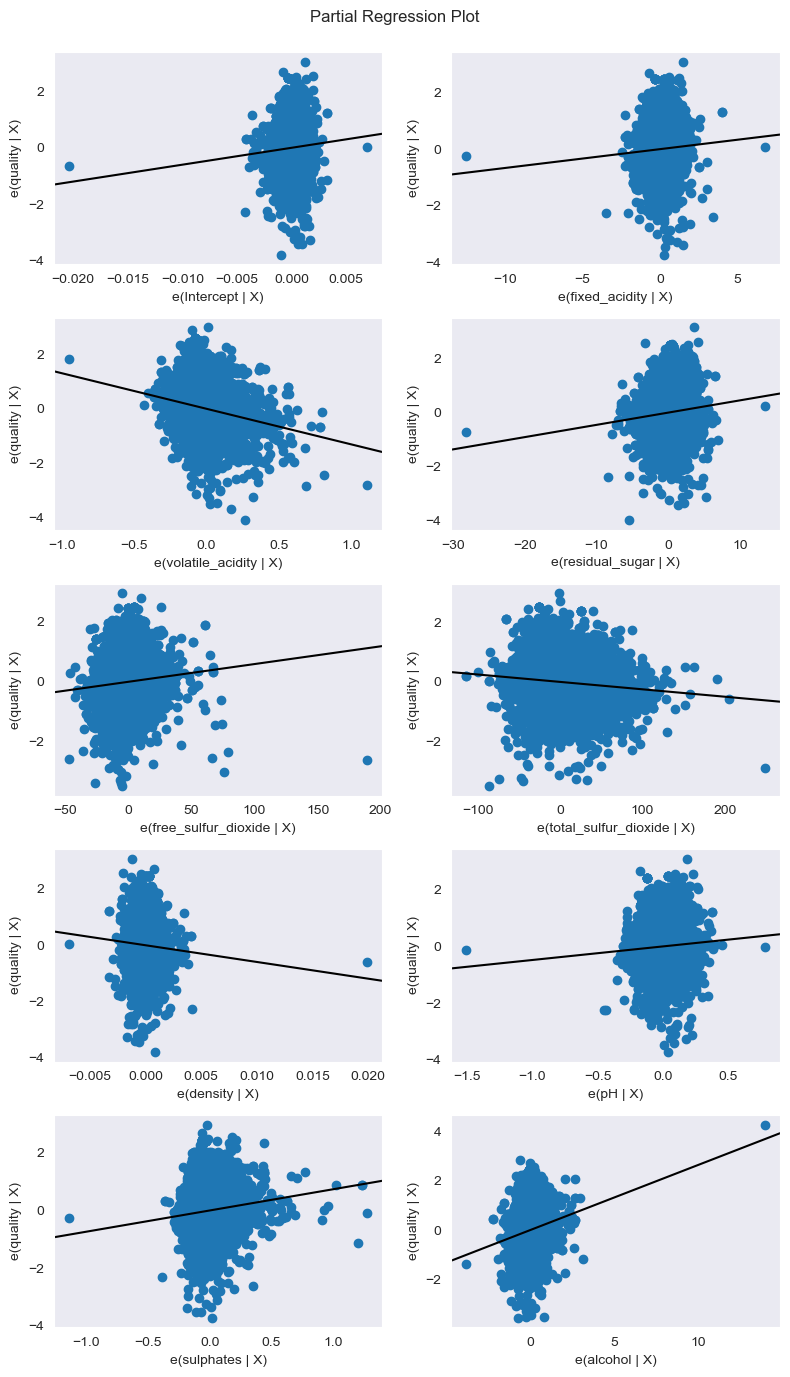

In [56]:
# 각 독립 변수가 종속 변수 quality에 미치는 영향력 시각화
fig = plt.figure(figsize = (8, 14))
sm.graphics.plot_partregress_grid(result, fig = fig)
plt.show()

## 상관분석과 히트맵
* 타이타닉 호 생존율 분석

In [57]:
raw = sns.load_dataset('titanic')
titanic = raw.copy()

In [58]:
titanic.to_csv('../data/ML_data/titanic.csv', index=False)

### 데이터 확인

In [59]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [60]:
# 결측치 확인
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [61]:
# age 처리
# mean or median
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
print(titanic.age.mean())
print(titanic.age.median())

29.69911764705882
28.0


In [65]:
titanic.age.fillna(titanic.age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [67]:
titanic.age = titanic.age.fillna(titanic.age.median())
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
